In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
X_numpy, y_numpy = datasets.make_regression(n_samples =100, n_features=1, noise=20, random_state=1)

In [3]:
# prepare data
X = torch.from_numpy(X_numpy.astype(np.float32))
X[:5]
X.shape

torch.Size([100, 1])

In [4]:
y = torch.from_numpy(y_numpy.astype(np.float32))
y[:7]

tensor([-55.5386, -10.6620,  22.7574, 101.0961, 144.3376,  33.2888,  33.0153])

In [5]:
y = y.view(y.shape[0],1)
y[:7]

tensor([[-55.5386],
        [-10.6620],
        [ 22.7574],
        [101.0961],
        [144.3376],
        [ 33.2888],
        [ 33.0153]])

In [6]:
n_samples, n_features = X.shape
print(n_samples)

100


In [7]:
# model
input_size = n_features
output_size = 1
model = nn.Linear(input_size,output_size)
lr = 0.01

In [8]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = lr)

In [9]:
num_epochs = 100
for epoch in range(num_epochs):
    y_predicted = model(X)
    loss = criterion(y_predicted,y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch+1)%10 == 0:
        print(f'epoch: {epoch+1}, loss={loss.item():.4f}')

epoch: 10, loss=4363.4814
epoch: 20, loss=3256.3340
epoch: 30, loss=2455.1523
epoch: 40, loss=1874.7686
epoch: 50, loss=1453.9203
epoch: 60, loss=1148.4791
epoch: 70, loss=926.6116
epoch: 80, loss=765.3264
epoch: 90, loss=647.9981
epoch: 100, loss=562.5913


<function matplotlib.pyplot.show(*args, **kw)>

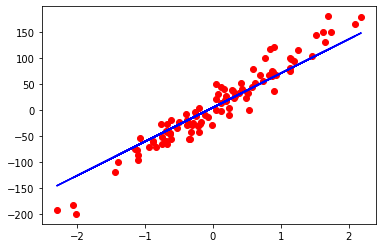

In [10]:
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show